In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from miscellaneous import *



def calculate_PRC_mean(model,simulation,neuron,version=None):
    if version is not None:
        
        x = np.load('output/{}/PRC_data/lstm_states_{}_model_eps:{}.h5.npy'.format(model,simulation,version))
    else:
        x = np.load('output/{}/lstm_states_{}.npy'.format(model,simulation))
    x = x.mean(axis=0)
    
    yt = x[:,neuron]
    
    difference = yt[1:]-yt[:-1]
    if version is not None:
        z= np.zeros(319)
        z.fill(version)
    else:
        z = np.zeros(320)
        for j in range(1,8):
            z[j*40:j*40+40]=j
        z = z[:-1]
        z = z*40
    return yt[1:],difference,z

def calculate_PRC(model,simulation,neuron):
    x = np.load('output/{}/lstm_states_{}.npy'.format(model,simulation))
    
    yt = x[:,:,neuron]
    print(yt.shape)
    difference = yt[:,1:]-yt[:,:-1]
    
    z = np.zeros((yt.shape[0],320))
    for j in range(1,8):
        z[:,j*40:j*40+40]=j
    z = z[:,:-1]
    z = z*40
    return yt[:,1:],difference,z

In [2]:
def Plot_PRC_versions(model,simulation,day,neuron):
    #Getting available mid-point
    versions = Get_LSTM_Files(model,simulation)
    v = len(versions)
    yt = np.zeros((v,319))
    difference = np.zeros((v,319))
    z = np.zeros((v,319))
    number = np.zeros(v)
    for i in range(v):#0,v,10):
        yt[i],difference[i],z[i] = calculate_PRC_mean(64,0,neuron,version=versions[i])
        number[i]= versions[i]
    
    #Generate 8 colors
    colors = plt.cm.jet(np.linspace(0,1,v))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    wday_start = 40*day-1
    wday_end= wday_start+40
    #for i in range(v):
    #    ax.scatter(yt[i,wday_start:wday_end],difference[i,wday_start:wday_end],z[i,wday_start:wday_end],color=colors[i])
    #ax = fig.add_subplot(2,1,2, projection='3d')
    for i in range(v):
        ax.scatter(yt[i,wday_start:wday_end],difference[i,wday_start:wday_end],z[i,wday_start:wday_end],color=colors[i])
    plt.show()

In [7]:
miao = np.load('output/64/PRC_data/BI_lstm_states_0.npy')

In [5]:
one = np.load('output/{}/PRC_data/lstm_states_{}_model_eps:{}.h5.npy'.format(64,0,versions[0]))

In [6]:
lst_states = np.zeros([len(versions),one.shape[0],one.shape[1],one.shape[2]])

In [8]:
for simulation in range(1,21):
    versions = Get_LSTM_Files(64,simulation)
    for i in range(len(versions)):
        print(i,versions[i])
        one = np.load('output/{}/PRC_data/lstm_states_{}_model_eps:{}.h5.npy'.format(64,simulation,versions[i])) 
        lst_states[i] = one
        del one
        gc.collect()
np.save('{}/{}/PRC_data/BI_lstm_states_{}'.format('output',64,simulation),lst_states)

0 100
1 200
2 300
3 400
4 500
5 600
6 700
7 800
8 900
9 1000
10 1100
11 1200
12 1300
13 1400
14 1500
15 1600
16 1700
17 1800
18 1900
19 2000
20 2100
21 2200
22 2300
23 2400
24 2500
25 2600
26 2700
27 2800
28 2900
29 3000
30 3100
31 3200
32 3300
33 3400
34 3500
35 3600
36 3700
37 3800
38 3900
39 4000
40 4100
41 4200
42 4300
43 4400
44 4500
45 4600
46 4700
47 4800
48 4900
49 5000
50 5100
51 5200
52 5300
53 5400
54 5500
55 5600
56 5700
57 5800
58 5900
59 6000
60 6100
61 6200
62 6300
63 6400
64 6500
65 6600
66 6700
67 6800
68 6900
69 7000
70 7100
71 7200
72 7300
73 7400
74 7500
75 7600
76 7700
77 7800
78 7900
79 8000
80 8100
81 8200
82 8300
83 8400
84 8500
85 8600
86 8700
87 8800
88 8900
89 9000
90 9100
91 9200
92 9300
93 9400
94 9500
95 9600
96 9700
97 9800
98 9900
99 10000
100 10100
101 10200
102 10300
103 10400
104 10500
105 10600
106 10700
107 10800
108 10900
109 11000
110 11100
111 11200
112 11300
113 11400
114 11500
115 11600
116 11700
117 11800
118 11900
119 12000
120 12100
121 1220

In [15]:
np.save('{}/{}/PRC_data/BI_lstm_states_{}'.format('output',64,0),lst_states)

In [6]:
np_arrays[0].shape

(1000, 320, 128)

In [ ]:
all_lstm = np.stack(np_arrays)

In [2]:
versions = Get_LSTM_Files(64,0)

In [4]:
np_arrays[0].shape

(1000, 320, 128)

In [6]:
versions[1]

200

In [3]:
len(versions)

375

<IPython.core.display.Javascript object>


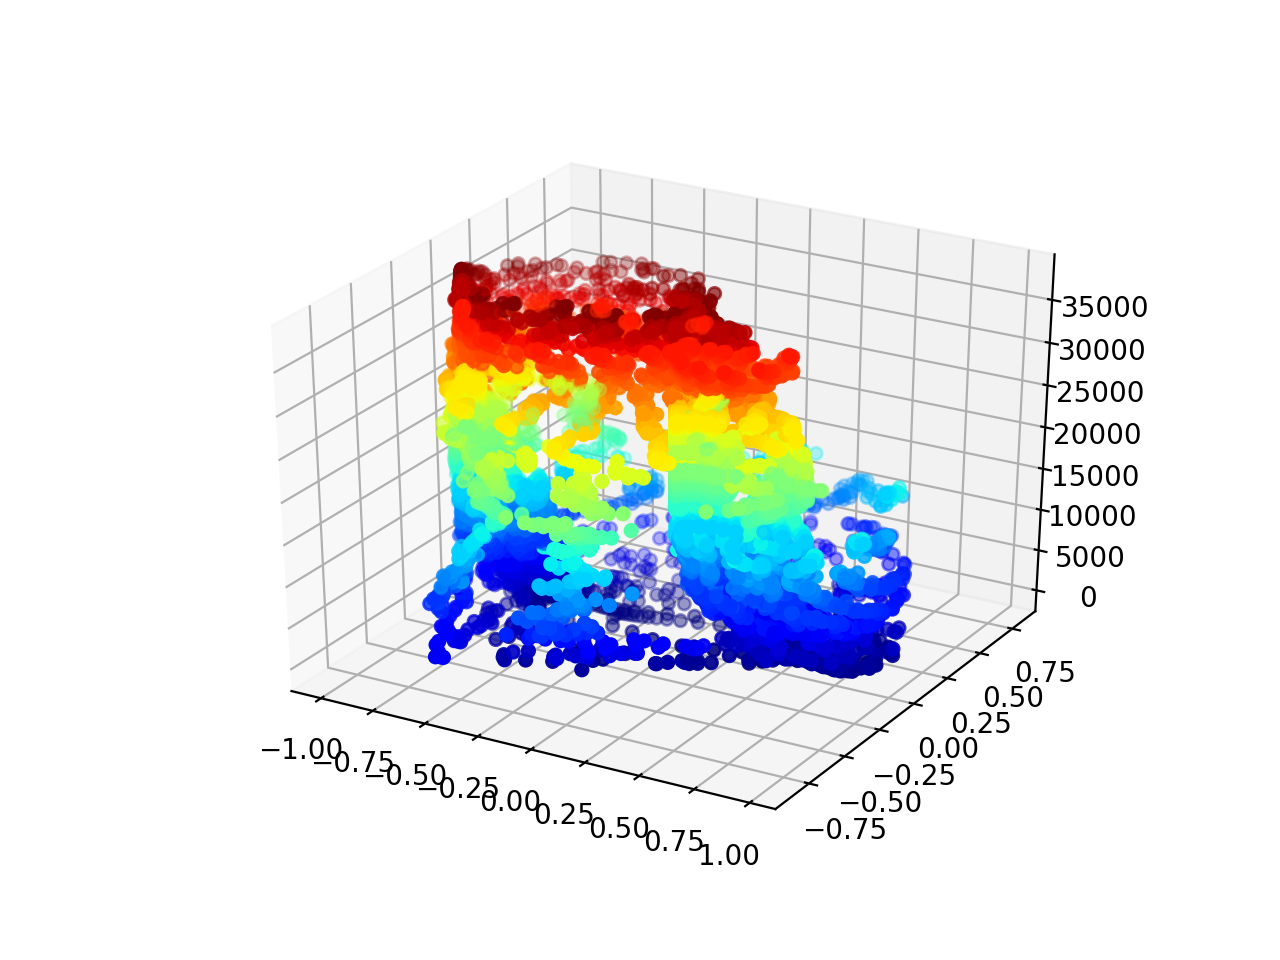

In [4]:
Plot_PRC_versions(64,0,5,43)


#ax.plot(yt[0],difference[0],z[0],color=colors[i])
x = np.zeros(319)
x.fill(-0.4)
y = np.zeros(319)
#ax.plot(x,y,z,'--')#,color='r')

<IPython.core.display.Javascript object>


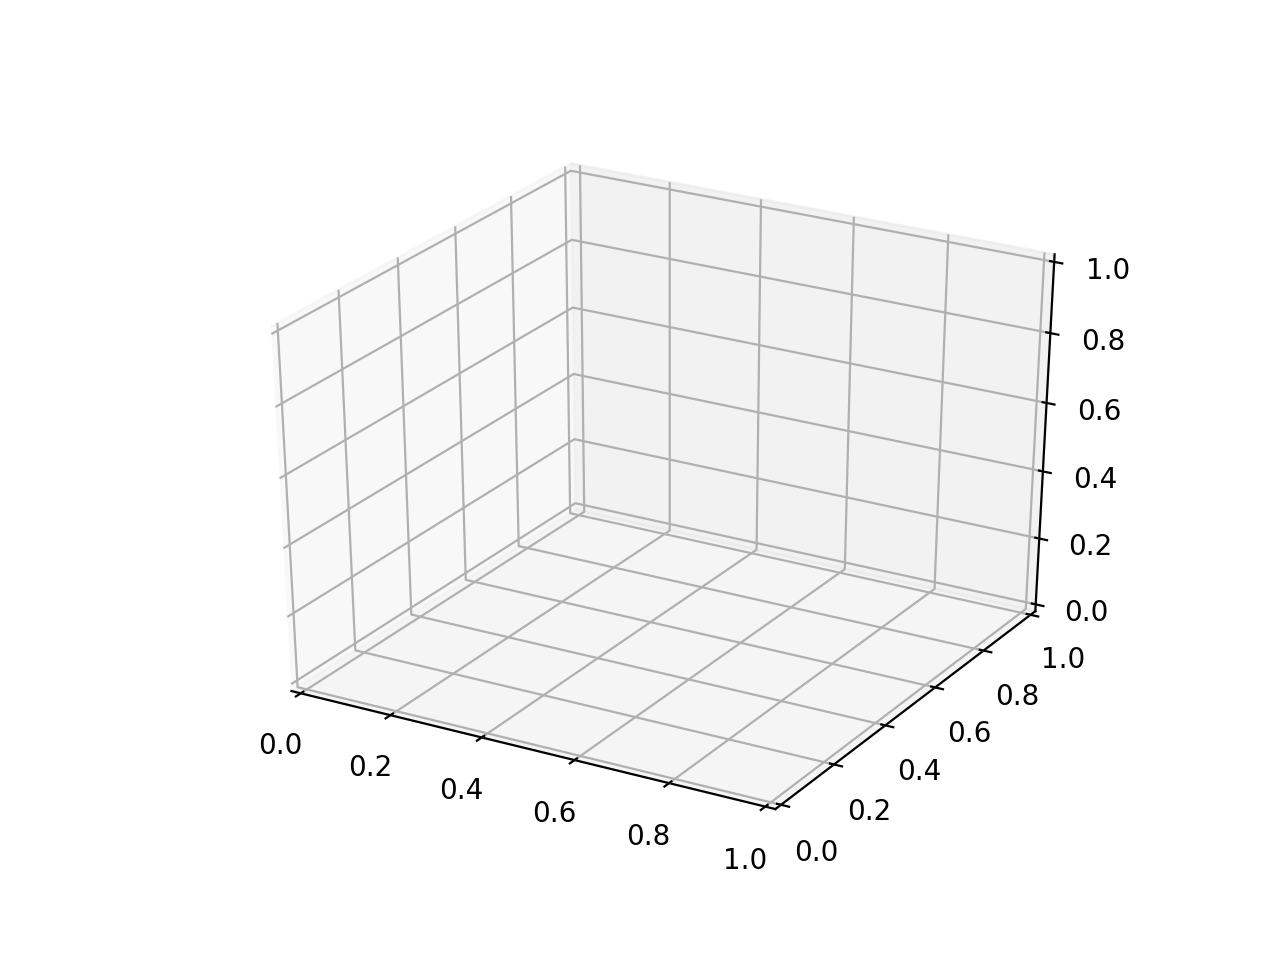

In [5]:
Plot_PRC_versions(202,0,5,43)

In [ ]:
def calculate_PRC(model,simulation,neuron):
    x = np.load('output/{}/lstm_states_{}.npy'.format(model,simulation))
    
    yt = x[:,:,neuron]
    print(yt.shape)
    difference = yt[:,1:]-yt[:,:-1]
    
    z = np.zeros((yt.shape[0],320))
    for j in range(1,8):
        z[:,j*40:j*40+40]=j
    z = z[:,:-1]
    z = z*40
    return yt[:,1:],difference,z

In [ ]:
lstm = 

In [9]:
versions = Get_LSTM_Files(202,0)

In [ ]:
    v = len(versions)
    yt = np.zeros((v,319))
    difference = np.zeros((v,319))
    z = np.zeros((v,319))
    number = np.zeros(v)
    for i in range(v):#0,v,10):
        yt[i],difference[i],z[i] = calculate_PRC_mean(64,0,neuron,version=versions[i])
        number[i]= versions[i]
    
    #Generate 8 colors
    colors = plt.cm.jet(np.linspace(0,1,v))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    wday_start = 40*day-1
    wday_end= wday_start+40
    #for i in range(v):
    #    ax.scatter(yt[i,wday_start:wday_end],difference[i,wday_start:wday_end],z[i,wday_start:wday_end],color=colors[i])
    #ax = fig.add_subplot(2,1,2, projection='3d')
    for i in range(v):
        ax.scatter(yt[i,wday_start:wday_end],difference[i,wday_start:wday_end],z[i,wday_start:wday_end],color=colors[i])
    plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#for i in range(8):
    

for i in range(8):
    ax.plot(yt[i*40:i*40+40],difference[i*40:i*40+40],z[i*40:i*40+40],color=colors[i])
x = np.zeros(319)
x.fill(-0.4)
y = np.zeros(319)
ax.plot(x,y,z,'--')#,color='r')
#plt.axis('off')